In [65]:
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle
import pandas as pd
import re
import glob

data_dir = "../data/"
list_from_bird_dir = "../data/ogle2_and_3/xrom_fixed/list.txt"

In [76]:
os.system("cd {} && pwd".format(data_dir))

0

In [102]:
# load the list of SPX names from Bird+2012 and their corresponding IDs

with open(list_from_bird_dir) as f:
    lines = f.readlines()

ids_names = [re.split("\s+", line)[:3] for line in lines]
ids_names = [x[1:] if (x[0] == '') else x for x in ids_names]
ids_names = [x[:2] if len(x)>2 else x for x in ids_names]
ids_names = [x for x in ids_names if len(x)>1]
ids_names_bird = {int(sxp_id): sxp_name.lower() for sxp_id,sxp_name in ids_names}

In [111]:
# check the dates that the different data sets span for each source

# data_sets = ["ogle2_3/xrom_fixed/phot_I_calib/", "ogle3/", "ogle4/"]


ogle2_3_start_end = {}
ogle3_start_end = {}
ogle4_start_end = {}

for source_index, source_name in ids_names_bird.items():
    source_data = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/{}.dat'.format(source_index))
    ogle2_3_start_end[source_name] = (source_data[0,0], source_data[-1,0])
    
for source_index, source_name in ids_names_bird.items():
    try:
        source_data = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle3/{}/phot.dat'.format(source_name))
        ogle3_start_end[source_name] = (source_data[0,0]-2450000, source_data[-1,0]-2450000)
    except:
        print("{} not found in OGLE3".format(source_name))
        ogle3_start_end[source_name] = (np.nan, np.nan)
        
        
for source_index, source_name in ids_names_bird.items():
    try:
        source_data = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle4/{}/phot.dat'.format(source_name))
        ogle4_start_end[source_name] = (source_data[0,0]-2450000, source_data[-1,0]-2450000)
    except:
        print("{} not found in OGLE4".format(source_name))
        ogle4_start_end[source_name] = (np.nan, np.nan)
        
ogle_dates = pd.DataFrame({"ogle2_3_start":[x[0] for x in ogle2_3_start_end.values()],
                           "ogle2_3_end":[x[1] for x in ogle2_3_start_end.values()], 
                           "ogle3_start":[x[0] for x in ogle3_start_end.values()], 
                           "ogle3_end":[x[1] for x in ogle3_start_end.values()], 
                           "ogle4_start":[x[0] for x in ogle4_start_end.values()], 
                           "ogle4_end":[x[1] for x in ogle4_start_end.values()]},
                          index=ids_names_bird.values())

sxp3.34 not found in OGLE3
sxp6.85 not found in OGLE3
sxp6.88 not found in OGLE3
sxp11.5 not found in OGLE3
sxp65.8 not found in OGLE3
sxp348 not found in OGLE3
rx-j0516.0-6916 not found in OGLE4
xmmu-j054134.7-682550 not found in OGLE4
rx-j0544.1-7100 not found in OGLE4
sxp2.763 not found in OGLE4
sxp18.3 not found in OGLE4
sxp31.0 not found in OGLE4
sxp152.1 not found in OGLE4
sxp202b not found in OGLE4
sxp264 not found in OGLE4
sxp455a not found in OGLE4
sxp455b not found in OGLE4
sxp893 not found in OGLE4
ma93-798 not found in OGLE4


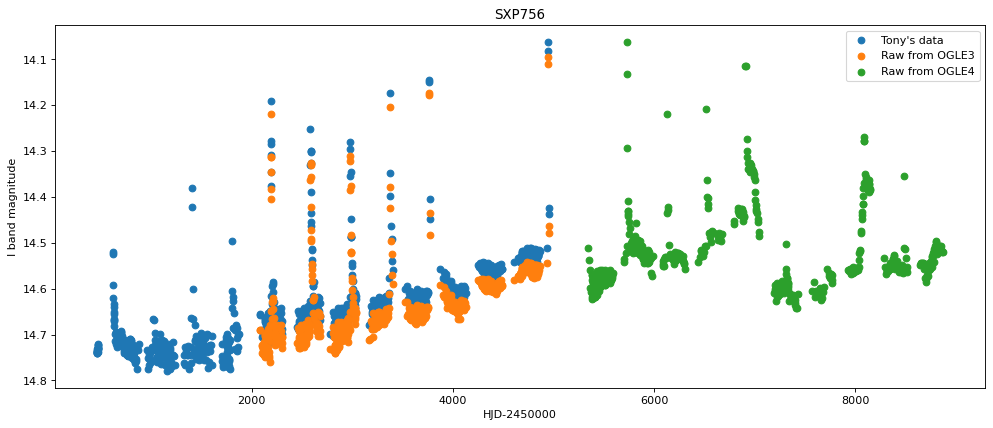

In [133]:
sxp304_bird = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/46.dat')
sxp304_ogle3 = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle3/sxp756/phot.dat')
sxp304_ogle4 = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle4/sxp756/phot.dat')


plt.figure(figsize=(15, 6), dpi=80)
plt.scatter(sxp304_bird[:,0], sxp304_bird[:,1], label="Tony's data")
plt.scatter(sxp304_ogle3[:,0]-2450000, sxp304_ogle3[:,1], label="Raw from OGLE3")
plt.scatter(sxp304_ogle4[:,0]-2450000, sxp304_ogle4[:,1], label="Raw from OGLE4")
plt.title("SXP756")
plt.xlabel("HJD-2450000")
plt.ylabel("I band magnitude")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

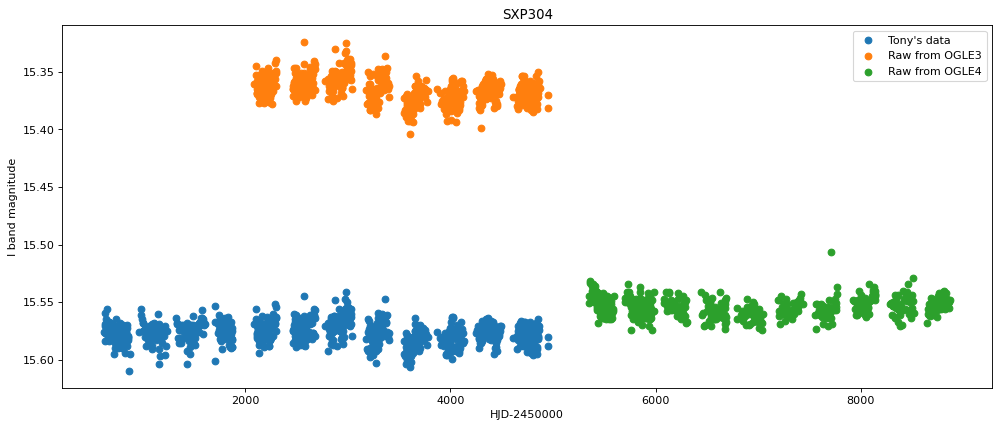

In [134]:
sxp304_bird = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/35.dat')
sxp304_ogle3 = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle3/sxp304/phot.dat')
sxp304_ogle4 = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle4/sxp304/phot.dat')


plt.figure(figsize=(15, 6), dpi=80)
plt.scatter(sxp304_bird[:,0], sxp304_bird[:,1], label="Tony's data")
plt.scatter(sxp304_ogle3[:,0]-2450000, sxp304_ogle3[:,1], label="Raw from OGLE3")
plt.scatter(sxp304_ogle4[:,0]-2450000, sxp304_ogle4[:,1], label="Raw from OGLE4")
plt.title("SXP304")
plt.xlabel("HJD-2450000")
plt.ylabel("I band magnitude")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

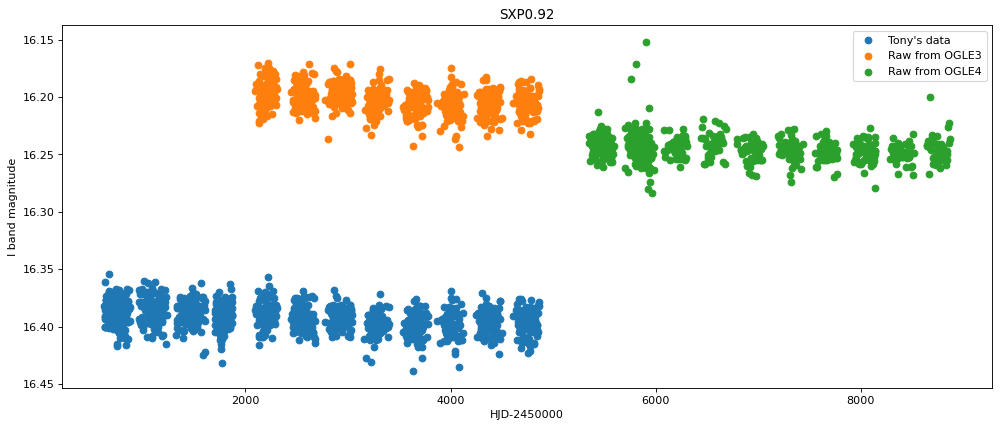

In [136]:
sxp304_bird = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/7.dat')
sxp304_ogle3 = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle3/sxp0.92/phot.dat')
sxp304_ogle4 = np.loadtxt('/data/jkok1g14/ogle_xrom/period_search/data/ogle4/sxp0.92/phot.dat')


plt.figure(figsize=(15, 6), dpi=80)
plt.scatter(sxp304_bird[:,0], sxp304_bird[:,1], label="Tony's data")
plt.scatter(sxp304_ogle3[:,0]-2450000, sxp304_ogle3[:,1], label="Raw from OGLE3")
plt.scatter(sxp304_ogle4[:,0]-2450000, sxp304_ogle4[:,1], label="Raw from OGLE4")
plt.title("SXP0.92")
plt.xlabel("HJD-2450000")
plt.ylabel("I band magnitude")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [112]:
ogle_dates

,ogle2_3_start,ogle2_3_end,ogle3_start,ogle3_end,ogle4_start,ogle4_end
rx-j0513.9-6951,2167.84574,4951.52447,2167.84574,4951.52447,5260.61208,8921.57089
rx-j0516.0-6916,457.65019,4953.51680,2112.93166,4953.51680,NaN,NaN
rx-j0520.5-6932,455.67483,4953.51680,2112.93166,4953.51680,5260.61208,8921.57089
xmmu-j054134.7-682550,2187.30000,4947.03000,2168.85358,4947.53151,NaN,NaN
cal-83,2187.79538,4947.53151,2168.85358,4947.53151,5261.66360,8921.58569
rx-j0544.1-7100,2168.86801,4933.58937,2168.86801,4933.58937,NaN,NaN
sxp0.92,625.43000,4866.05000,2090.90645,4866.55206,5346.92112,8869.57546
sxp2.37,2086.92527,4868.56023,2086.92527,4868.56023,5346.92112,8759.65313
sxp2.763,2086.93259,4868.56724,2086.93259,4868.56724,NaN,NaN
sxp7.78,2086.89212,4952.92202,2086.89212,4952.92202,5346.91893,8869.57316


In [95]:
ogle2_3_start_end

{'rx-j0513.9-6951': (2167.84574, 4951.52447),
 'rx-j0516.0-6916': (457.65019, 4953.5168),
 'rx-j0520.5-6932': (455.67483, 4953.5168),
 'xmmu-j054134.7-682550': (2187.3, 4947.03),
 'cal-83': (2187.79538, 4947.53151),
 'rx-j0544.1-7100': (2168.86801, 4933.58937),
 'sxp0.92': (625.43, 4866.05),
 'sxp2.37': (2086.92527, 4868.56023),
 'sxp2.763': (2086.93259, 4868.56724),
 'sxp7.78': (2086.89212, 4952.92202),
 'sxp8.80': (466.60781, 4952.92202),
 'sxp9.13': (466.043, 4954.39),
 'sxp15.3': (466.55712, 4954.88836),
 'sxp18.3': (466.5448, 4952.92202),
 'sxp22.07': (2104.8951, 4873.5558),
 'sxp25.5': (621.8006, 4954.88836),
 'sxp31.0': (2104.8951, 4873.5558),
 'sxp34.08': (2086.43, 4954.43),
 'sxp46.6': (2086.39, 4954.43),
 'sxp59.0': (626.93294, 4954.92531),
 'sxp74.7': (466.54467, 4954.88836),
 'sxp82.4': (466.57656, 4952.92202),
 'sxp91.1': (2086.89595, 4865.55783),
 'sxp101': (2086.92153, 4954.9177),
 'sxp138': (2086.89212, 4952.92202),
 'sxp140': (2086.92886, 4954.92531),
 'sxp152.1': (208

In [73]:
glob.glob(os.path.join(data_set_dir+"1*"))

[]

In [74]:
glob.glob("/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/1*")

['/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/1.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/18.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/15.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/11.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/10.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/14.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/19.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/16.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/13.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/12.dat',
 '/data/jkok1g14/ogle_xrom/period_search/data/ogle2_and_3/xrom_fixed/phot_I_calib/17.dat']

In [72]:
os.path.join(data_set_dir+"1.dat")

'../data/ogle2_3/xrom_fixed/phot_I_calib/1.dat'

In [ ]:
# Photometry data files contain 5 columns: Hel.JD, I magnitude, magnitude error, seeing estimation (in pixels - 0.26"/pixel) and sky level

# save data as csv, merging OGLE III and IV if both are available
sources={}
dir_list = []

# search for photometry data in OGLE IV folder
for root, dirnames, filenames in os.walk(data_path+"/ogle4"):
    for filename in fnmatch.filter(filenames, "phot.dat"):
        source_name = root.split("/")[-1]
        lc_path_4 = os.path.join(root, filename)
        lc_path_3 = os.path.join(root.replace("ogle4", "ogle3"), filename)
        try: # try to merge OGLE III and IV data
            ogle3 = np.loadtxt(lc_path_3, usecols=(0,1,2))
            ogle4 = np.loadtxt(lc_path_4, usecols=(0,1,2))
            data = np.vstack((ogle3, ogle4))
            sources[root.split("/")[-1]] = "{} measurements, start: {} end: {}".format(len(data), data[0][0]-2450000,data[-1][0]-2450000)
            np.savetxt(data_path+"/ogle_merged/{}.csv".format(source_name), data, delimiter=",")
            dir_list.append(source_name)
        except: # if merging doesn't work, save only OGLE IV
            ogle4 = np.loadtxt(lc_path_4, usecols=(0,1,2))
            sources[root.split("/")[-1]] = "{} measurements, start: {} end: {}".format(len(data), data[0][0]-2450000,data[-1][0]-2450000)
            np.savetxt(data_path+"/ogle_merged/{}.csv".format(source_name), ogle4, delimiter=",")
            dir_list.append(source_name)

# save any OGLE III data that does not have an OGLE IV counterpart
for root, dirnames, filenames in os.walk(data_path+"/ogle3"):
    for filename in fnmatch.filter(filenames, "phot.dat"):
        source_name = root.split("/")[-1]
        if source_name not in dir_list:
            lc_path_3 = os.path.join(root, filename)
            ogle3 = np.loadtxt(lc_path_3, usecols=(0,1,2))
            sources[root.split("/")[-1]] = "{} measurements, start: {} end: {}".format(len(data), data[0][0]-2450000,data[-1][0]-2450000)
            np.savetxt(data_path+"/ogle_merged/{}.csv".format(source_name), ogle3, delimiter=",")
            dir_list.append(source_name)